Crypto Analysis with Python

In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving BTC_USD_2020-03-29-CoinDesk.csv to BTC_USD_2020-03-29-CoinDesk.csv
Saving ETH_USD_2020-03-29-CoinDesk.csv to ETH_USD_2020-03-29-CoinDesk.csv
Saving LTC_USD_2020-03-29-CoinDesk.csv to LTC_USD_2020-03-29-CoinDesk.csv


In [0]:
df_btc = pd.read_csv('BTC_USD_2020-03-29-CoinDesk.csv')

In [0]:
df_eth = pd.read_csv('ETH_USD_2020-03-29-CoinDesk.csv')

In [0]:
df_ltc = pd.read_csv('LTC_USD_2020-03-29-CoinDesk.csv')

In [0]:
df_btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-03-24,3977.707443,3977.276039,4006.984568,3961.802425
1,BTC,2019-03-25,3968.438701,3977.707443,3990.965292,3940.879744
2,BTC,2019-03-26,3913.781717,3972.696582,3982.232764,3903.293930
3,BTC,2019-03-27,3915.375320,3913.781742,3928.979427,3876.720858
4,BTC,2019-03-28,4018.590510,3925.865359,4030.357641,3914.577708


In [0]:
df = pd.DataFrame({'BTC': df_btc['Closing Price (USD)'],
                   'ETH': df_eth['Closing Price (USD)'],
                   'LTC': df_ltc['Closing Price (USD)']
                   })

In [0]:
df.head()

,BTC,ETH,LTC
0,3977.707443,136.449900,60.401342
1,3968.438701,135.398581,59.389013
2,3913.781717,133.302631,58.642234
3,3915.375320,133.491076,58.012024
4,4018.590510,138.070098,60.995540


In [17]:
df.describe()

,BTC,ETH,LTC
count,367.000000,367.000000,367.000000
mean,8410.349872,194.294643,72.830109
std,1904.082774,47.695586,25.151876
min,3913.781717,107.898345,32.053195
25%,7293.434617,162.738970,55.804175
50%,8537.339652,182.106743,69.528733
75%,9825.563183,224.134093,88.036201
max,12575.904067,324.130855,139.383189


In [0]:
import matplotlib.pyplot as plt

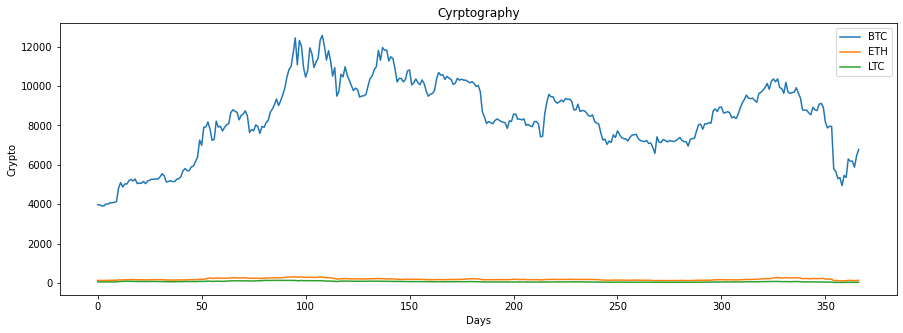

In [26]:
plt.figure(figsize=(15, 5))

for c in df.columns.values:
  plt.plot(df[c], label=c)
plt.title('Cyrptography')
plt.xlabel('Days')
plt.ylabel('Crypto')
plt.legend(df.columns.values)
# plt.show()

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))

In [0]:
scaled = min_max_scaler.fit_transform(df)

In [30]:
scaled

array([[ 0.7379915 , 13.20409938, 26.41213946],
       [ 0.63098836, 12.7179009 , 25.4689459 ],
       [ 0.        , 11.74859717, 24.77316767],
       ...,
       [22.74914088,  7.11068025,  3.47599246],
       [29.34238133, 11.87231121,  6.31822438],
       [33.13894884, 14.89847896,  8.06373635]])

In [0]:
df_scaled = pd.DataFrame(scaled, columns=df.columns)

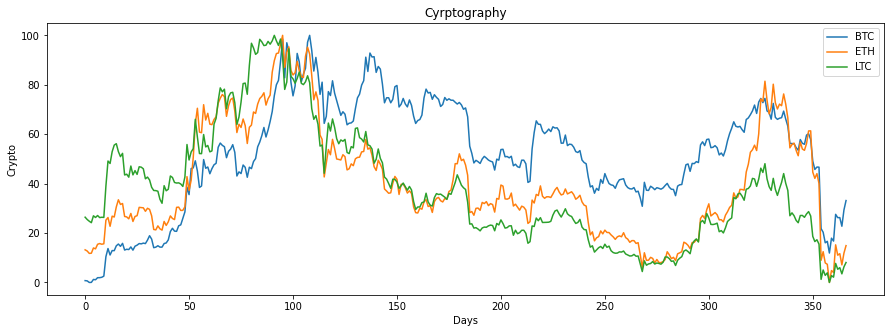

In [32]:
plt.figure(figsize=(15, 5))

for c in df_scaled.columns.values:
  plt.plot(df_scaled[c], label=c)
plt.title('Cyrptography')
plt.xlabel('Days')
plt.ylabel('Crypto')
plt.legend(df_scaled.columns.values)
# plt.show()

In [0]:
DSR = df.pct_change(1)

In [34]:
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.002330,-0.007705,-0.016760
2,-0.013773,-0.015480,-0.012574
3,0.000407,0.001414,-0.010747
4,0.026362,0.034302,0.051429
...,...,...,...
362,-0.018375,-0.064350,-0.063073
363,0.000287,0.010083,0.018255
364,-0.048927,-0.073697,-0.069921
365,0.097057,0.083523,0.085250


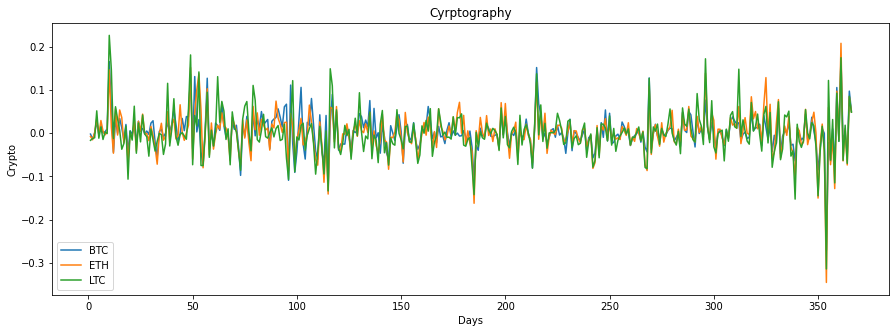

In [41]:
plt.figure(figsize=(15, 5))

for c in df_scaled.columns.values:
  plt.plot(DSR.index, DSR[c], label=c)
plt.title('Cyrptography')
plt.xlabel('Days')
plt.ylabel('Crypto')
plt.legend(df_scaled.columns.values)
# plt.show()

In [42]:
DSR.std()

BTC    0.041305
ETH    0.047326
LTC    0.053094
dtype: float64

In [43]:
DSR.mean()

BTC    0.002320
ETH    0.001235
LTC    0.000340
dtype: float64

In [48]:
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.839502,0.776832
ETH,0.839502,1.000000,0.851104
LTC,0.776832,0.851104,1.000000


In [0]:
import seaborn as sns

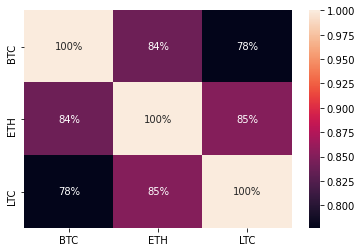

In [55]:
sns.heatmap(DSR.corr(), annot=True, fmt='.0%')

In [0]:
# Daily returns for each coin
DCSR = (DSR+1).cumprod()

In [63]:
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.997670,0.992295,0.983240
2,0.983929,0.976935,0.970876
3,0.984330,0.978316,0.960443
4,1.010278,1.011874,1.009837
...,...,...,...
362,1.554986,0.965579,0.625555
363,1.555432,0.975315,0.636975
364,1.479330,0.903437,0.592437
365,1.622908,0.978895,0.642942


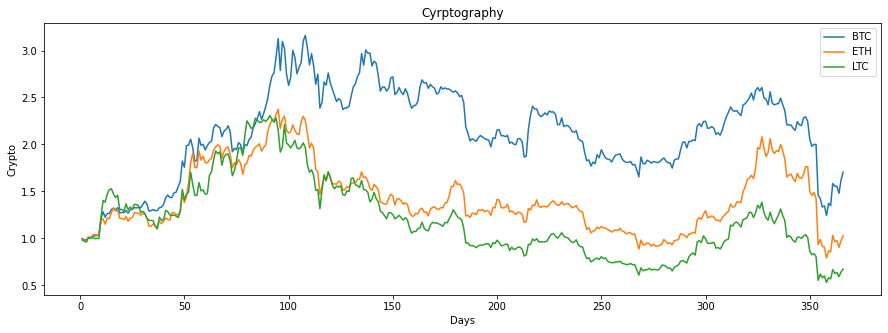

In [66]:
plt.figure(figsize=(15, 5))

for c in df_scaled.columns.values:
  plt.plot(DCSR.index, DCSR[c], label=c)
plt.title('Cyrptography')
plt.xlabel('Days')
plt.ylabel('Crypto')
plt.legend(df_scaled.columns.values)
# plt.show()